# Easy Money - Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
__DATA_PATH__ = "../data/processed"
__MODEL_METRICS_REPORT_PATH__ = "../reports/model_evaluation_output.csv"

TARGET = "credit_card"

DEV_PARTITION_PERIOD = ("2018-01-28", "2019-02-28")
VAL_PARTITION_PERIOD = ("2019-03-28", "2019-05-28")

EXCLUDE_COLUMNS = ["pk_cid", "pk_partition"]

## Import data

In [3]:
dtypes = {'pk_cid': 'int64', 'active_customer': 'int8',
          'region_code': 'int8', 'gender': 'int8', 'age': 'int8', 'deceased': 'int8',
          'short_term_deposit': 'int8', 'loans': 'int8', 'mortgage': 'int8',
          'funds': 'int8', 'securities': 'int8', 'long_term_deposit': 'int8',
          'em_account_pp': 'int8', 'credit_card': 'int8', 'payroll': 'int8',
          'pension_plan': 'int8', 'payroll_account': 'int8', 'emc_account': 'int8',
          'debit_card': 'int8', 'em_account_p': 'int8', 'em_acount': 'int8',
          'entry_date_month': 'int8', 'entry_date_year': 'int8', 'entry_date_day': 'int8',
          'entry_date_week': 'int8', 'entry_date_weekday': 'int8', 'entry_date_trim': 'int8',
          'salary': 'float64', 'entry_channel_004': 'int8', 'entry_channel_007': 'int8',
          'entry_channel_013': 'int8', 'entry_channel_KAA': 'int8', 'entry_channel_KAB': 'int8',
          'entry_channel_KAD': 'int8', 'entry_channel_KAE': 'int8', 'entry_channel_KAF': 'int8',
          'entry_channel_KAG': 'int8', 'entry_channel_KAH': 'int8', 'entry_channel_KAI': 'int8',
          'entry_channel_KAJ': 'int8', 'entry_channel_KAK': 'int8', 'entry_channel_KAM': 'int8',
          'entry_channel_KAQ': 'int8', 'entry_channel_KAR': 'int8', 'entry_channel_KAS': 'int8',
          'entry_channel_KAT': 'int8', 'entry_channel_KAW': 'int8', 'entry_channel_KAY': 'int8',
          'entry_channel_KAZ': 'int8', 'entry_channel_KBE': 'int8', 'entry_channel_KBG': 'int8',
          'entry_channel_KBH': 'int8', 'entry_channel_KBO': 'int8', 'entry_channel_KBU': 'int8',
          'entry_channel_KBW': 'int8', 'entry_channel_KBY': 'int8', 'entry_channel_KBZ': 'int8',
          'entry_channel_KCB': 'int8', 'entry_channel_KCC': 'int8', 'entry_channel_KCH': 'int8',
          'entry_channel_KCI': 'int8', 'entry_channel_KCK': 'int8', 'entry_channel_KCL': 'int8',
          'entry_channel_KDA': 'int8', 'entry_channel_KDH': 'int8', 'entry_channel_KDR': 'int8',
          'entry_channel_KDS': 'int8', 'entry_channel_KDT': 'int8', 'entry_channel_KEH': 'int8',
          'entry_channel_KEJ': 'int8', 'entry_channel_KES': 'int8', 'entry_channel_KEY': 'int8',
          'entry_channel_KFA': 'int8', 'entry_channel_KFC': 'int8', 'entry_channel_KFD': 'int8',
          'entry_channel_KFF': 'int8', 'entry_channel_KFK': 'int8', 'entry_channel_KFL': 'int8',
          'entry_channel_KFP': 'int8', 'entry_channel_KFS': 'int8', 'entry_channel_KGC': 'int8',
          'entry_channel_KGN': 'int8', 'entry_channel_KGX': 'int8', 'entry_channel_KHC': 'int8',
          'entry_channel_KHD': 'int8', 'entry_channel_KHE': 'int8', 'entry_channel_KHF': 'int8',
          'entry_channel_KHK': 'int8', 'entry_channel_KHL': 'int8', 'entry_channel_KHM': 'int8',
          'entry_channel_KHN': 'int8', 'entry_channel_KHO': 'int8', 'entry_channel_KHP': 'int8',
          'entry_channel_KHQ': 'int8', 'entry_channel_KHS': 'int8', 'entry_channel_RED': 'int8',
          'entry_channel_UNKNOWN': 'int8', 'segment_00 - OTROS': 'int8',
          'segment_01 - TOP': 'int8', 'segment_02 - PARTICULARES': 'int8',
          'segment_03 - UNIVERSITARIO': 'int8', 'country_id_AR': 'int8', 'country_id_AT': 'int8',
          'country_id_BE': 'int8', 'country_id_BR': 'int8', 'country_id_CA': 'int8',
          'country_id_CH': 'int8', 'country_id_CI': 'int8', 'country_id_CL': 'int8',
          'country_id_CM': 'int8', 'country_id_CN': 'int8', 'country_id_CO': 'int8',
          'country_id_DE': 'int8', 'country_id_DJ': 'int8', 'country_id_DO': 'int8',
          'country_id_DZ': 'int8', 'country_id_ES': 'int8', 'country_id_ET': 'int8',
          'country_id_FR': 'int8', 'country_id_GA': 'int8', 'country_id_GB': 'int8',
          'country_id_GT': 'int8', 'country_id_HU': 'int8', 'country_id_IE': 'int8',
          'country_id_IT': 'int8', 'country_id_JM': 'int8', 'country_id_LU': 'int8',
          'country_id_MA': 'int8', 'country_id_MR': 'int8', 'country_id_MX': 'int8',
          'country_id_NO': 'int8', 'country_id_PE': 'int8', 'country_id_PL': 'int8',
          'country_id_PT': 'int8', 'country_id_QA': 'int8', 'country_id_RO': 'int8',
          'country_id_RU': 'int8', 'country_id_SA': 'int8', 'country_id_SE': 'int8',
          'country_id_SN': 'int8', 'country_id_US': 'int8', 'country_id_VE': 'int8'}

parse_dates = ['pk_partition']

In [4]:
%%time
df = pd.read_csv(f"{__DATA_PATH__}/easy_money_classification.csv", dtype=dtypes, parse_dates=parse_dates)
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("entry_date", axis=1, inplace=True)
df["pk_partition"] = pd.to_datetime(df["pk_partition"])
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962838 entries, 0 to 5962837
Columns: 143 entries, pk_cid to country_id_VE
dtypes: datetime64[ns](1), float64(1), int64(1), int8(140)
memory usage: 932.6 MB
Wall time: 40.5 s


In [5]:
df.head(20)

,pk_cid,pk_partition,active_customer,region_code,gender,age,deceased,short_term_deposit,loans,mortgage,...,country_id_PL,country_id_PT,country_id_QA,country_id_RO,country_id_RU,country_id_SA,country_id_SE,country_id_SN,country_id_US,country_id_VE
0,15891,2018-07-28,1,28,1,59,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15891,2018-08-28,0,28,1,59,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16063,2018-11-28,1,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16063,2018-12-28,1,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16063,2019-01-28,1,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,16063,2019-02-28,1,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,16063,2019-03-28,0,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,16063,2019-04-28,1,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,16063,2019-05-28,0,28,1,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,16203,2018-12-28,0,8,0,70,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,5962838.0,1.234933e+06,162293.085772,15891.0,1112533.0,1231097.0,1352339.75,1553689.0
active_customer,5962838.0,4.033799e-01,0.490576,0.0,0.0,0.0,1.00,1.0
region_code,5962838.0,2.580417e+01,13.603136,-1.0,13.0,28.0,36.00,52.0
gender,5962838.0,5.177870e-01,0.499684,0.0,0.0,1.0,1.00,1.0
age,5962838.0,2.976015e+01,11.980074,2.0,22.0,25.0,34.00,105.0
...,...,...,...,...,...,...,...,...
country_id_SA,5962838.0,2.850991e-06,0.001688,0.0,0.0,0.0,0.00,1.0
country_id_SE,5962838.0,2.683286e-06,0.001638,0.0,0.0,0.0,0.00,1.0
country_id_SN,5962838.0,2.850991e-06,0.001688,0.0,0.0,0.0,0.00,1.0
country_id_US,5962838.0,3.270255e-05,0.005719,0.0,0.0,0.0,0.00,1.0


## Classes

In [78]:
class EasyMoneyFilter(BaseEstimator, TransformerMixin):

    def __init__(self, target: str, group_by="pk_cid", sort_value=None):
        if sort_value is None:
            sort_value = ["pk_cid", "pk_partition"]
        self.target = target
        self.group_by = group_by
        self.sort_values = sort_value

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return pd.concat([
            self.get_fist_sales(X),
            self.get_last_no_sales(X)
        ]).sort_values(self.sort_values, ignore_index=True)

    def get_fist_sales(self, X) -> pd.DataFrame:
        first_sale = X.groupby([self.group_by, self.target]).first().reset_index()
        return first_sale[first_sale[self.target] == 1]

    def get_last_no_sales(self, X) -> pd.DataFrame:
        last_no_sale = X.groupby([self.group_by, self.target]).last().reset_index()
        return last_no_sale[last_no_sale[self.target] == 0]


class EasyMoneySplitter:

    def __init__(self, dev_partition_period: tuple, val_partition_period: tuple, exclude_columns):
        self.dev_partition_period = dev_partition_period
        self.val_partition_period = val_partition_period
        self.exclude_columns = exclude_columns

    def get_train_partition(self, dataframe: pd.DataFrame) -> pd.DataFrame:
        return self._get_partition(dataframe, self.dev_partition_period[0], self.dev_partition_period[1])

    def get_validation_partition(self, dataframe: pd.DataFrame) -> pd.DataFrame:
        return self._get_partition(dataframe, self.val_partition_period[0], self.val_partition_period[1])

    def _get_partition(self, dataframe: pd.DataFrame, from_date, to_date) -> pd.DataFrame:
        partition = self._split(dataframe, from_date, to_date)
        return partition.drop(self.exclude_columns, axis=1)

    def _split(self, dataframe: pd.DataFrame, from_date, to_date) -> pd.DataFrame:
        return dataframe[dataframe["pk_partition"].between(from_date, to_date)].reset_index(drop=True)


class Reporter:

    def __init__(self, output_file):
        self.output_file = output_file
        try:
            self.output_df = pd.read_csv(self.output_file, index_col=0)
            self.output_df["date"] = pd.to_datetime(self.output_df["date"])
        except FileNotFoundError:
            self.output_df = pd.DataFrame(columns=[
                "target",
                "target_mean",
                "date",
                "is_overfitted",
                "roc_auc_train",
                "roc_auc_test",
                "roc_auc_val",
                "accuracy_train",
                "accuracy_test",
                "accuracy_val",
                "recall_train",
                "recall_test",
                "recall_val",
                "precision_train",
                "precision_test",
                "precision_val",
                "f1_score_train",
                "f1_score_test",
                "f1_score_val",
                "model"
            ])

    def append_new_evaluation(self, data):
        data["is_overfitted"] = round(abs((data["roc_auc_train"] - data["roc_auc_test"])), 2) > 0
        data["date"] = datetime.now()
        self.output_df = self.output_df.append(data, ignore_index=True)

    def record_evaluation(self, target, model, X_train, y_train, X_test, y_test, X_val, y_val, target_mean):
        train_metrics = get_metrics(model, X_train, y_train)
        test_metrics = get_metrics(model, X_test, y_test)
        val_metrics = get_metrics(model, X_val, y_val)
        report_dict = {
            "target": target,
            "roc_auc_train": train_metrics["roc_auc"],
            "roc_auc_test": test_metrics["roc_auc"],
            "roc_auc_val": val_metrics["roc_auc"],
            "accuracy_train": train_metrics["accuracy"],
            "accuracy_test": test_metrics["accuracy"],
            "accuracy_val": val_metrics["accuracy"],
            "recall_train": train_metrics["recall"],
            "recall_test": test_metrics["recall"],
            "recall_val": val_metrics["recall"],
            "precision_train": train_metrics["precision"],
            "precision_test": test_metrics["precision"],
            "precision_val": val_metrics["precision"],
            "f1_score_train": train_metrics["f1_score"],
            "f1_score_test": test_metrics["f1_score"],
            "f1_score_val": val_metrics["f1_score"],
            "target_mean": target_mean,
            "model": best_model
        }
        self.append_new_evaluation(report_dict)
        return self.save_csv()

    def save_csv(self):
        self.output_df.drop_duplicates(keep="last", inplace=True)
        self.output_df.to_csv(self.output_file)
        return self.output_df

reporter = Reporter(__MODEL_METRICS_REPORT_PATH__)

## Functions

In [8]:
def hist_plot(dataframe: pd.DataFrame, target: str):
    dataframe[target].hist()
    plt.show()
    print(target)
    print(dataframe[target].value_counts())


def relation_with_target(dataframe: pd.DataFrame, field: str, target: str):
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)
    sns.countplot(data=dataframe, x=field, hue=target)
    plt.show()
    return dataframe.pivot_table(index=field, values=target, aggfunc=[len, sum, np.mean])


def print_metrics(model, X, y):
    prediction = model.predict(X)
    y_score = get_y_score(model, X, y)
    print('AUC Score : ' + str(roc_auc_score(y, y_score)))
    print('Accuracy Score : ' + str(accuracy_score(y, prediction)))
    print('Precision Score : ' + str(precision_score(y, prediction)))
    print('Recall Score : ' + str(recall_score(y, prediction)))
    print('F1 Score : ' + str(f1_score(y, prediction)))
    return confusion_matrix(y, prediction)


def get_y_score(model, X, y) -> pd.DataFrame:
    return pd.DataFrame(model.predict_proba(X)[:, 1], index=y.index, columns=['score'])


def get_metrics(model, X, y):
    prediction = model.predict(X)
    y_score = get_y_score(model, X, y)
    return dict({
        "roc_auc": roc_auc_score(y, y_score),
        "accuracy": accuracy_score(y, prediction),
        "precision": precision_score(y, prediction),
        "recall": recall_score(y, prediction),
        "f1_score": f1_score(y, prediction),
    })

## Filter data

In [9]:
filter = EasyMoneyFilter(TARGET)
df_prep = filter.fit_transform(df)
df_prep

,pk_cid,credit_card,pk_partition,active_customer,region_code,gender,age,deceased,short_term_deposit,loans,...,country_id_PL,country_id_PT,country_id_QA,country_id_RO,country_id_RU,country_id_SA,country_id_SE,country_id_SN,country_id_US,country_id_VE
0,15891,0,2018-08-28,0,28,1,59,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16063,0,2019-05-28,0,28,1,62,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16203,0,2019-05-28,1,8,0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16502,0,2019-05-28,1,28,1,58,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17457,0,2019-05-28,1,28,1,54,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463503,1553685,0,2019-05-28,0,13,0,52,0,0,0,...,0,0,0,0,0,0,0,0,0,0
463504,1553686,0,2019-05-28,0,41,1,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
463505,1553687,0,2019-05-28,0,28,0,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
463506,1553688,0,2019-05-28,0,39,1,43,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Target distribution

In [10]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,463508.0,1.273129e+06,180362.924979,15891.0,1141746.75,1282439.5,1421938.25,1553689.0
credit_card,463508.0,1.840529e-02,0.134412,0.0,0.00,0.0,0.00,1.0
active_customer,463508.0,3.862695e-01,0.486894,0.0,0.00,0.0,1.00,1.0
region_code,463508.0,2.587621e+01,13.521672,-1.0,13.00,28.0,36.00,52.0
gender,463508.0,5.102717e-01,0.499895,0.0,0.00,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
country_id_SA,463508.0,2.157460e-06,0.001469,0.0,0.00,0.0,0.00,1.0
country_id_SE,463508.0,4.314920e-06,0.002077,0.0,0.00,0.0,0.00,1.0
country_id_SN,463508.0,2.157460e-06,0.001469,0.0,0.00,0.0,0.00,1.0
country_id_US,463508.0,4.099174e-05,0.006402,0.0,0.00,0.0,0.00,1.0


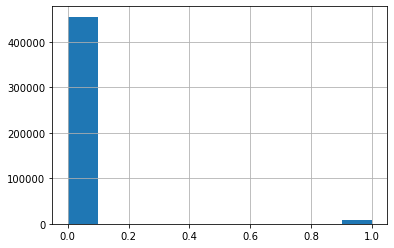

credit_card
0    454977
1      8531
Name: credit_card, dtype: int64


In [11]:
hist_plot(df_prep, TARGET)

<AxesSubplot:xlabel='credit_card', ylabel='age'>

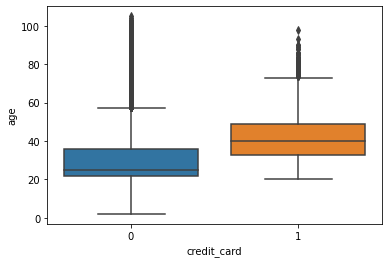

In [12]:
sns.boxplot(data=df_prep, x=TARGET, y="age")

<AxesSubplot:xlabel='credit_card', ylabel='active_customer'>

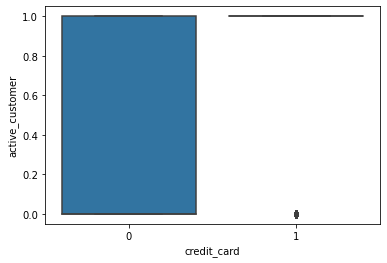

In [13]:
sns.boxplot(data=df_prep, x=TARGET, y="active_customer")

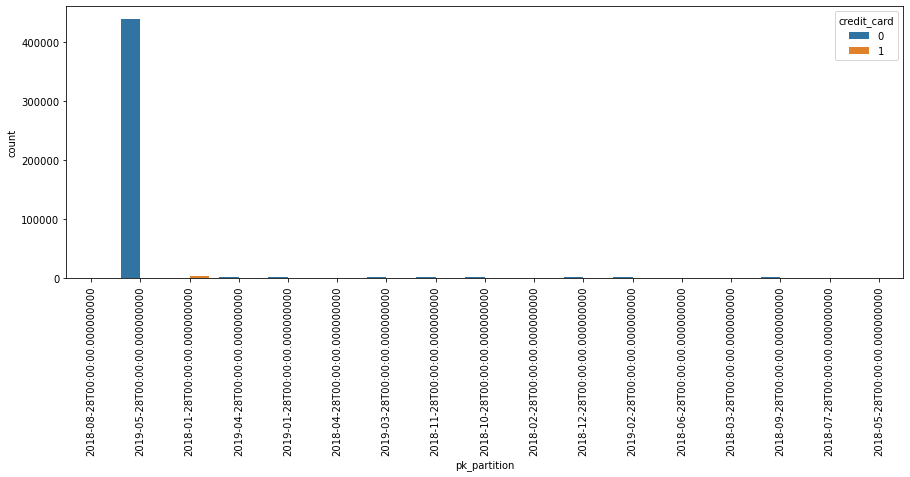

,len,sum,mean
,credit_card,credit_card,credit_card
pk_partition,,,
2018-01-28,3397,3325,0.978805
2018-02-28,624,510,0.817308
2018-03-28,662,551,0.832326
2018-04-28,490,400,0.816327
2018-05-28,483,373,0.772257
2018-06-28,531,406,0.764595
2018-07-28,1476,390,0.264228
2018-08-28,1386,331,0.238817


In [14]:
relation_with_target(df_prep, "pk_partition", TARGET)

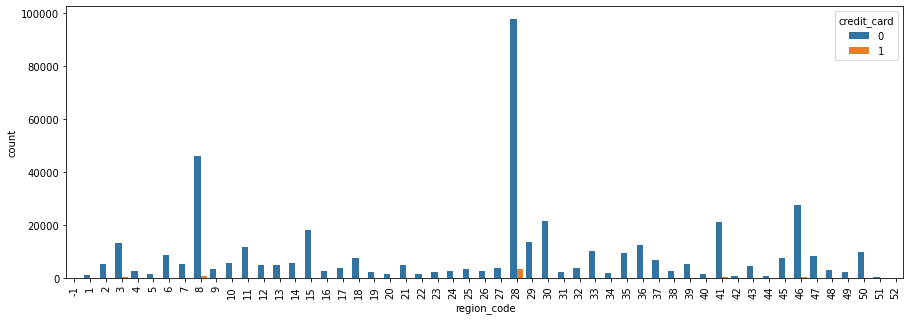

,len,sum,mean
,credit_card,credit_card,credit_card
region_code,,,
-1,177,15,0.084746
1,1086,32,0.029466
2,5280,51,0.009659
3,13682,255,0.018638
4,2698,60,0.022239
5,1567,16,0.010211
6,8773,53,0.006041
7,5397,146,0.027052


In [15]:
relation_with_target(df_prep, "region_code", TARGET)

## Split dataframes

In [16]:
splitter = EasyMoneySplitter(DEV_PARTITION_PERIOD, VAL_PARTITION_PERIOD, EXCLUDE_COLUMNS)

### Train partition

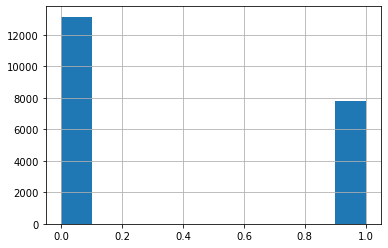

credit_card
0    13161
1     7797
Name: credit_card, dtype: int64


In [17]:
train_df = splitter.get_train_partition(df_prep)
hist_plot(train_df, TARGET)

### Validation partition

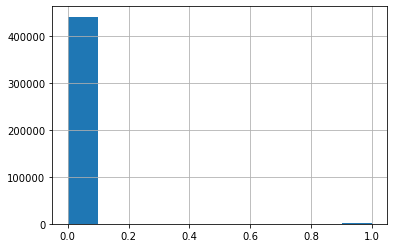

credit_card
0    441816
1       734
Name: credit_card, dtype: int64


In [18]:
validation_df = splitter.get_validation_partition(df_prep)
hist_plot(validation_df, TARGET)

#### Partitions

In [19]:
dev_X = train_df.drop(TARGET, axis=1)
dev_y = train_df[[TARGET]]

X_val = validation_df.drop(TARGET, axis=1)
y_val = validation_df[[TARGET]]

X_train, X_test, y_train, y_test = train_test_split(dev_X, dev_y, test_size=0.2, random_state=13, stratify=dev_y)

In [20]:
print(f"""
TRAIN:
    X_train.shape: {X_train.shape}
    y_train.shape: {y_train.shape}
TEST:
    X_test.shape: {X_test.shape}
    y_test.shape: {y_test.shape}
VALIDATION:
    X_val.shape: {X_val.shape}
    y_val.shape: {y_val.shape}
""")


TRAIN:
    X_train.shape: (16766, 140)
    y_train.shape: (16766, 1)
TEST:
    X_test.shape: (4192, 140)
    y_test.shape: (4192, 1)
VALIDATION:
    X_val.shape: (442550, 140)
    y_val.shape: (442550, 1)



## Modelling experimentation

In [94]:
best_model: XGBClassifier = XGBClassifier(
    # learning_rate=0.1,
    max_depth=3,
    # min_samples_leaf=200,
    # missing=None,
    random_state=42,
    use_label_encoder=False
)

eval_set = [(X_train, y_train.values.ravel()), (X_test, y_test.values.ravel())]
best_model.fit(
    X_train,
    y_train.values.ravel(),
    eval_set=eval_set,
    verbose=True,
    eval_metric="aucpr",
    early_stopping_rounds=10
)

[0]	validation_0-aucpr:0.77007	validation_1-aucpr:0.78160
[1]	validation_0-aucpr:0.78984	validation_1-aucpr:0.80173
[2]	validation_0-aucpr:0.80446	validation_1-aucpr:0.80895
[3]	validation_0-aucpr:0.80683	validation_1-aucpr:0.81562
[4]	validation_0-aucpr:0.80680	validation_1-aucpr:0.81618
[5]	validation_0-aucpr:0.81051	validation_1-aucpr:0.81531
[6]	validation_0-aucpr:0.81375	validation_1-aucpr:0.81880
[7]	validation_0-aucpr:0.81344	validation_1-aucpr:0.81903
[8]	validation_0-aucpr:0.81697	validation_1-aucpr:0.82544
[9]	validation_0-aucpr:0.81750	validation_1-aucpr:0.82157
[10]	validation_0-aucpr:0.81786	validation_1-aucpr:0.82106
[11]	validation_0-aucpr:0.81788	validation_1-aucpr:0.82132
[12]	validation_0-aucpr:0.81767	validation_1-aucpr:0.82100
[13]	validation_0-aucpr:0.81746	validation_1-aucpr:0.82120
[14]	validation_0-aucpr:0.81762	validation_1-aucpr:0.82063
[15]	validation_0-aucpr:0.81761	validation_1-aucpr:0.82072
[16]	validation_0-aucpr:0.81962	validation_1-aucpr:0.82192
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [83]:

# pipe = Pipeline(steps=[
#     # ("transform", StandardScaler()),
#     ("model", XGBClassifier(random_state=42, use_label_encoder=False))
# ])

In [84]:
# params = {
#     "model__learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
#     "model__max_depth": np.arange(3, 15),
#     'model__min_samples_leaf': [50, 100, 150]
#     # "model__min_child_weight": [1, 3, 5, 7],
#     # "model__gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
#     # "model__colsample_bytree": [0.3, 0.4, 0.5, 0.7]
# }

In [85]:
# best_model: RandomizedSearchCV = RandomizedSearchCV(
#     pipe,
#     param_distributions=params,
#     n_iter=2,
#     scoring='roc_auc',
#     n_jobs=-1,
#     cv=5,
#     verbose=3
# )

In [86]:
# eval_set = [(X_test, y_test.values.ravel())]
# best_model.fit(
#     X_train,
#     y_train.values.ravel(),
#     model__eval_set=eval_set,
#     model__verbose=True,
#     model__eval_metric="auc",
#     model__early_stopping_rounds=10
# )

In [87]:
# best_model.best_estimator_["model"]

In [88]:
# best_model.best_params_

In [89]:
# best_model.best_score_

In [90]:
# pipe2 = best_model.best_estimator_
#
# pipe2.fit(X_train, y_train, model__verbose=True)

In [95]:
report_df = reporter.record_evaluation(TARGET, best_model, X_train, y_train, X_test, y_test, X_val, y_val, train_df[TARGET].mean())
report_df.sort_values(by="date", ascending=False)

,target,target_mean,date,is_overfitted,roc_auc_train,roc_auc_test,roc_auc_val,accuracy_train,accuracy_test,accuracy_val,recall_train,recall_test,recall_val,precision_train,precision_test,precision_val,f1_score_train,f1_score_test,f1_score_val,model
18,credit_card,0.372030,2022-04-18 22:47:26.637864,False,0.925318,0.928474,0.849117,0.868007,0.875239,0.664174,0.974507,0.966667,0.985014,0.747418,0.762001,0.004842,0.845988,0.852218,0.009636,"XGBClassifier(base_score=0.5, booster='gbtree'..."
17,credit_card,0.372030,2022-04-18 22:45:31.752794,False,0.925318,0.928474,0.849117,0.868007,0.875239,0.664174,0.974507,0.966667,0.985014,0.747418,0.762001,0.004842,0.845988,0.852218,0.009636,"XGBClassifier(base_score=0.5, booster='gbtree'..."
16,credit_card,0.372030,2022-04-18 22:43:48.283557,False,0.928810,0.929619,0.846679,0.876536,0.882634,0.699799,0.965689,0.953846,0.929155,0.764437,0.779874,0.005109,0.853358,0.858131,0.010163,"XGBClassifier(base_score=0.5, booster='gbtree'..."
15,credit_card,0.372030,2022-04-18 22:39:07.069281,True,0.928810,0.929619,0.846679,0.876536,0.882634,0.699799,0.965689,0.953846,0.929155,0.764437,0.779874,0.005109,0.853358,0.858131,0.010163,"XGBClassifier(base_score=0.5, booster='gbtree'..."
14,credit_card,0.372030,2022-04-18 22:38:38.014625,True,0.928810,0.929619,0.846679,0.876536,0.882634,0.699799,0.965689,0.953846,0.929155,0.764437,0.779874,0.005109,0.853358,0.858131,0.010163,"XGBClassifier(base_score=0.5, booster='gbtree'..."
13,credit_card,0.372030,2022-04-18 22:38:15.482890,True,0.928810,0.929619,0.846679,0.876536,0.882634,0.699799,0.965689,0.953846,0.929155,0.764437,0.779874,0.005109,0.853358,0.858131,0.010163,"XGBClassifier(base_score=0.5, booster='gbtree'..."
12,credit_card,0.372030,2022-04-18 22:36:28.349269,True,0.928810,0.929619,0.846679,0.876536,0.882634,0.699799,0.965689,0.953846,0.929155,0.764437,0.779874,0.005109,0.853358,0.858131,0.010163,"XGBClassifier(base_score=0.5, booster='gbtree'..."
11,credit_card,0.372030,2022-04-18 22:30:52.693904,True,0.928810,0.929619,0.846679,0.876536,0.882634,0.699799,0.965689,0.953846,0.929155,0.764437,0.779874,0.005109,0.853358,0.858131,0.010163,"XGBClassifier(base_score=0.5, booster='gbtree'..."
10,credit_card,0.372030,2022-04-18 22:28:49.000739,True,0.919372,0.922418,0.861859,0.863593,0.869990,0.622773,0.973385,0.967949,0.990463,0.741089,0.753117,0.004336,0.841500,0.847125,0.008634,"XGBClassifier(base_score=0.5, booster='gbtree'..."
9,credit_card,0.372030,2022-04-18 22:25:16.441363,True,0.929953,0.928669,0.838041,0.876595,0.883349,0.673768,0.968735,0.958333,0.950954,0.763264,0.779052,0.004813,0.853812,0.859442,0.009577,"XGBClassifier(base_score=0.5, booster='gbtree'..."


Text(0, 0.5, 'TPR')

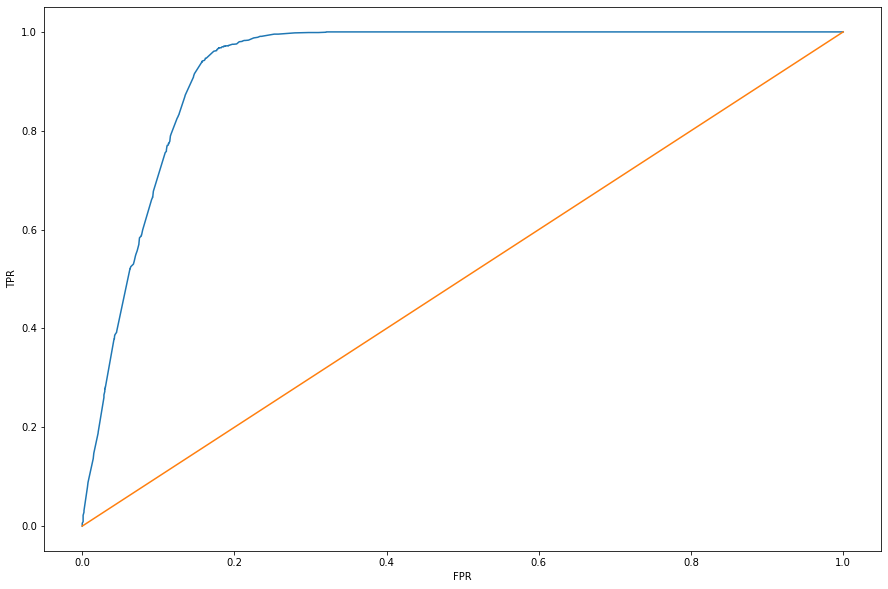

In [96]:
fpr, tpr, th = roc_curve(y_test, get_y_score(best_model, X_test, y_test))
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')

<AxesSubplot:>

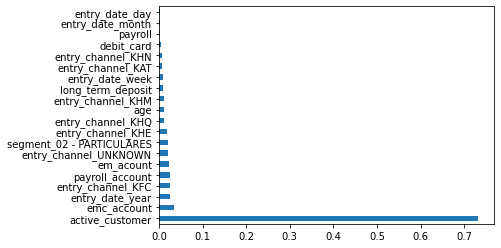

In [97]:
feat_importances = pd.Series(best_model.feature_importances_, index=dev_X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
# from sklearn.model_selection import cross_val_score
#
# score = cross_val_score(best_model, X_train, y_train.values.ravel(), cv=10, scoring='roc_auc')
# print(score)

## Modelling

In [43]:
model: XGBClassifier = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\alfre\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\alfre\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[14:38:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
test_prediction = model.predict(X_test)

print("TEST")
print('AUC Score : ' + str(roc_auc_score(y_test, test_prediction)))
print('Accuracy Score : ' + str(accuracy_score(y_test, test_prediction)))
print('Precision Score : ' + str(precision_score(y_test, test_prediction)))
print('Recall Score : ' + str(recall_score(y_test, test_prediction)))
print('F1 Score : ' + str(f1_score(y_test, test_prediction)))

confusion_matrix(y_test, test_prediction)

TEST
AUC Score : 0.6917481104394017
Score : 0.7675773516601617
Accuracy Score : 0.7675773516601617
Precision Score : 0.749483399917344
Recall Score : 0.958425085880384
F1 Score : 0.841173514746241


array([[ 2689,  3637],
       [  472, 10881]], dtype=int64)

In [45]:
validation_prediction = model.predict(X_val)

print("VALIDATION")
print('AUC Score : ' + str(roc_auc_score(y_val, validation_prediction)))
print('Accuracy Score : ' + str(accuracy_score(y_val, validation_prediction)))
print('Precision Score : ' + str(precision_score(y_val, validation_prediction)))
print('Recall Score : ' + str(recall_score(y_val, validation_prediction)))
print('F1 Score : ' + str(f1_score(y_val, validation_prediction)))

confusion_matrix(y_test, test_prediction)

VALIDATION
AUC Score : 0.5390969259396357
Accuracy Score : 0.33290131501575665
Precision Score : 0.018094256468581177
Recall Score : 0.7522163120567376
F1 Score : 0.03533846068414038


array([[ 2689,  3637],
       [  472, 10881]], dtype=int64)

In [48]:
def generate_clf_from_search(grid_or_random, clf, parameters, scorer, X, y):
    if grid_or_random == "Grid":
        search_obj = GridSearchCV(clf, parameters, scoring=scorer)
    elif grid_or_random == "Random":
        search_obj = RandomizedSearchCV(clf, parameters, scoring=scorer)
    fit_obj = search_obj.fit(X, y)
    best_clf = fit_obj.best_estimator_
    return best_clf

In [49]:
from sklearn.metrics import make_scorer

parameters = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [50, 100, 150],
    # 'min_samples_split':[2,3,4,5],
    # 'criterion': ['gini', 'entropy']
}
scorer = make_scorer(roc_auc_score)

In [ ]:
best_clf_random = generate_clf_from_search(
    "Random",
    model,
    parameters,
    scorer,
    X_train,
    y_train
)

In [ ]:
best_clf_random.best_estimator_

In [59]:
best_clf_random.best_params_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_params_'

In [58]:
best_clf_random.best_score_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_score_'

In [45]:
from sklearn import metrics

sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_clf_random, X_test, y_test, cv=5, scoring='roc_auc')
scores.mean()

0.8875681079685387

In [39]:
best_clf_random.fit(X_train, y_train)
# Make predictions using the new model.
best_train_predictions = best_clf_random.predict(X_train)
best_test_predictions = best_clf_random.predict(X_test)
best_validation_predictions = best_clf_random.predict(X_val)

# Calculate the f1_score of the new model.
print("TEST")
print('AUC Score : ' + str(roc_auc_score(y_test, best_test_predictions)))
print('Accuracy Score : ' + str(accuracy_score(y_test, best_test_predictions)))
print('Precision Score : ' + str(precision_score(y_test, best_test_predictions)))
print('Recall Score : ' + str(recall_score(y_test, best_test_predictions)))
print('F1 Score : ' + str(f1_score(y_test, best_test_predictions)))

print("VALIDATION")
print('AUC Score : ' + str(roc_auc_score(y_val, best_validation_predictions)))
print('Accuracy Score : ' + str(accuracy_score(y_val, best_validation_predictions)))
print('Precision Score : ' + str(precision_score(y_val, best_validation_predictions)))
print('Recall Score : ' + str(recall_score(y_val, best_validation_predictions)))
print('F1 Score : ' + str(f1_score(y_val, best_validation_predictions)))

TEST
AUC Score : 0.7662356481244059
Accuracy Score : 0.9358846988036101
Precision Score : 0.9533958553925276
Recall Score : 0.9767395010072835
F1 Score : 0.9649265156154317
VALIDATION
AUC Score : 0.604942960128016
Accuracy Score : 0.35988806198140066
Precision Score : 0.07923599260523322
Recall Score : 0.8844246031746031
F1 Score : 0.1454417906551814


In [49]:
model = best_clf_random

## Modelling

In [50]:
_MAX_DEPTH = 4
_MIN_SAMPLES_LEAF = 100
_RANDOM_STATE = 42

_MIN_CHILD_WEIGHT = 100
_N_ESTIMATORS = 50

In [51]:
# model = xgb.XGBClassifier(
#     max_depth=_MAX_DEPTH,
#     min_child_weight=_MIN_CHILD_WEIGHT,
#     n_estimators=_N_ESTIMATORS,
#     random_state=_RANDOM_STATE,
#     use_label_encoder=False
# )

In [52]:
# model.fit(X_train, y_train)

In [96]:
# accuracy = round(model.score(X_val, y_val), 4)
# print('Accuracy: %0.4f' % (accuracy))

Accuracy: 0.3837


In [53]:
y_score = pd.DataFrame(model.predict_proba(X_test)[:, 1], index=y_test.index, columns=['score'])
roc_auc_score(y_test, y_score)

0.8867158336732655

Text(0, 0.5, 'TPR')

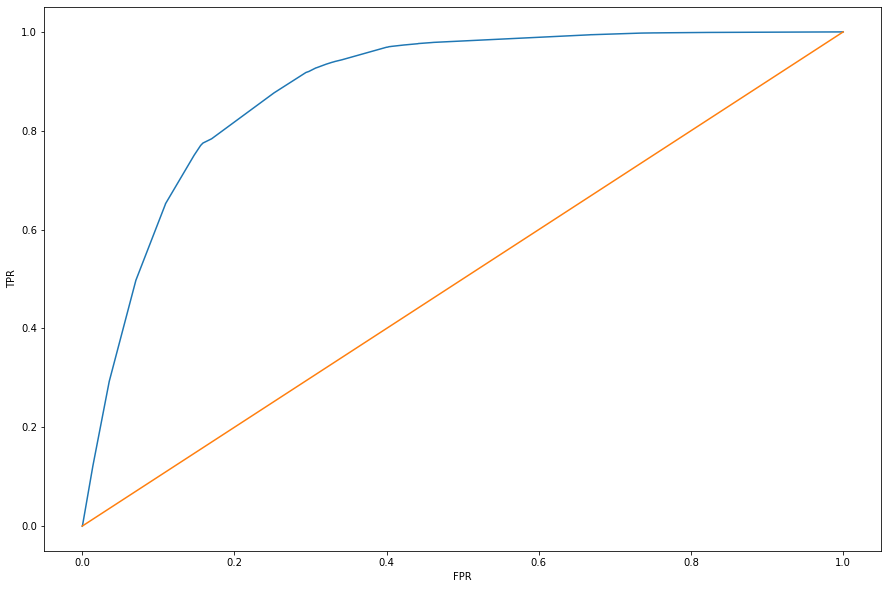

In [54]:
fpr, tpr, th = roc_curve(y_test, y_score)
plt.figure(figsize=(15, 10))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')

<AxesSubplot:>

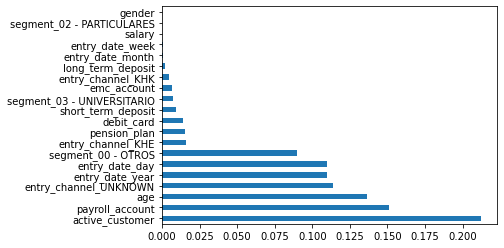

In [55]:
feat_importances = pd.Series(model.feature_importances_, index=dev_X.columns)
feat_importances.nlargest(20).plot(kind='barh')